In [54]:
import pandas as pd
import numpy as np
import urllib
import seaborn as sns
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import json
import requests
import datetime

#config
from weather_config import api_key

In [30]:
# Open World Cities CSV
world_cities = pd.read_csv('worldcities.csv')

In [31]:
# Create Random Subset of World Cities
random_sample_cities = world_cities.sample(n = 700)
reset_index_random_cities = random_sample_cities.reset_index()
random_cities = reset_index_random_cities[['Country', 'City', 'Latitude', 'Longitude']]
random_cities.head()

,Country,City,Latitude,Longitude
0,mx,tlaxco,20.433333,-98.016667
1,de,bergen,52.816667,9.966667
2,us,boston,42.358333,-71.060278
3,no,hundorp,61.550000,9.900000
4,cz,hustopece,48.941028,16.733530


In [32]:
# Combining City and Country so API returns correct city
random_cities.head()

,Country,City,Latitude,Longitude
0,mx,tlaxco,20.433333,-98.016667
1,de,bergen,52.816667,9.966667
2,us,boston,42.358333,-71.060278
3,no,hundorp,61.550000,9.900000
4,cz,hustopece,48.941028,16.733530


In [33]:
# Create settings
settings = {"units": "imperial", "appid": api_key}

In [34]:
# Get current weather
cities = random_cities['City']
random_world_cities = []
world_countries = []
clouds = []
date = []
humidity = []
latitudes = []
longitudes = []
max_temp = []
wind_speeds = []
cities_no_info = []
no_name_cities = []

for city in cities:
    if len(random_world_cities) < 500:
        try:
            url = "http://api.openweathermap.org/data/2.5/weather?"
            query_url = url + "appid=" + api_key + "&q=" + city
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            current_weather = owm.get_current(city, **settings)
            city_name = weather_json['name']
            city_country = weather_json['sys']['country']
            cloud = weather_json['clouds']['all']
            weather_date = weather_json['dt']
            city_humidity = weather_json['main']['humidity']
            city_lat = weather_json['coord']['lat']
            city_lon = weather_json['coord']['lon']
            city_temp = weather_json['main']['temp_max']
            city_wind = weather_json['wind']['speed']
            if city not in cities:
                try:
                    random_world_cities.append(city_name)
                    world_countries.append(city_country)
                    clouds.append(cloud)
                    date.append(weather_date)
                    humidity.append(city_humidity)
                    latitudes.append(city_lat)
                    longitudes.append(city_lon)
                    max_temp.append(city_temp)
                    wind_speeds.append(city_wind)
                    print("Processing Record " + str(len(random_world_cities)) + " : " + city)
                    print(query_url)
                except KeyError:
                    no_name_cities.append(city)
        except urllib.error.HTTPError as e:
            if e:
                cities_no_info.append(str(city) + ":" + "No info")

Processing Record 1 : tlaxco
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tlaxco
Processing Record 2 : boston
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=boston
Processing Record 3 : hundorp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hundorp
Processing Record 4 : hustopece
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hustopece
Processing Record 5 : movilita
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=movilita
Processing Record 6 : sint-genesius-rode
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sint-genesius-rode
Processing Record 7 : trebic
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=trebic
Processing Record 8 : la marque
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196

Processing Record 65 : salekhard
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=salekhard
Processing Record 66 : sallaumines
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sallaumines
Processing Record 67 : narang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=narang
Processing Record 68 : karasburg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=karasburg
Processing Record 69 : santa flavia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=santa flavia
Processing Record 70 : vinzili
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vinzili
Processing Record 71 : arnia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=arnia
Processing Record 72 : crystal lake
http://api.openweathermap.org/data/2.5/weather?appid=25

Processing Record 128 : villeurbanne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=villeurbanne
Processing Record 129 : litein
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=litein
Processing Record 130 : ripiceni
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ripiceni
Processing Record 131 : cumana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cumana
Processing Record 132 : talibon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=talibon
Processing Record 133 : le passage
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=le passage
Processing Record 134 : nor armavir
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nor armavir
Processing Record 135 : albany
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 191 : roxas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=roxas
Processing Record 192 : schrobenhausen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=schrobenhausen
Processing Record 193 : troina
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=troina
Processing Record 194 : pontianak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pontianak
Processing Record 195 : guadalupe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=guadalupe
Processing Record 196 : ejido hermosillo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ejido hermosillo
Processing Record 197 : bruchkobel
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bruchkobel
Processing Record 198 : san francisco
http://api.openweathermap.

Processing Record 254 : kasaragod
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kasaragod
Processing Record 255 : mingguang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mingguang
Processing Record 256 : pearland
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pearland
Processing Record 257 : phalauda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=phalauda
Processing Record 258 : fucecchio
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=fucecchio
Processing Record 259 : san luis potosi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san luis potosi
Processing Record 260 : bilwang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bilwang
Processing Record 261 : helsingborg
http://api.openweathermap.org/data/2

Processing Record 318 : ozu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ozu
Processing Record 319 : dzepciste
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dzepciste
Processing Record 320 : tamuin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tamuin
Processing Record 321 : shido
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shido
Processing Record 322 : san bonifacio
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san bonifacio
Processing Record 323 : sarandi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sarandi
Processing Record 324 : neral
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=neral
Processing Record 325 : topoloveni
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153e

Processing Record 381 : pinawa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pinawa
Processing Record 382 : krosno odrzanskie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=krosno odrzanskie
Processing Record 383 : pangal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pangal
Processing Record 384 : mus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mus
Processing Record 385 : pocinhos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pocinhos
Processing Record 386 : taperoa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=taperoa
Processing Record 387 : puma
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=puma
Processing Record 388 : padilla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f1

Processing Record 444 : terracina
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=terracina
Processing Record 445 : safidon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=safidon
Processing Record 446 : monching
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=monching
Processing Record 447 : vsetaty
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vsetaty
Processing Record 448 : san fernando
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san fernando
Processing Record 449 : hagondange
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hagondange
Processing Record 450 : aleksandrovskaya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aleksandrovskaya
Processing Record 451 : erbach
http://api.openweathermap.org/dat

In [35]:
# Count to see how many entries I have, the goal is 500
len(random_world_cities)

500

In [36]:
random_world_cities_df = pd.DataFrame(random_world_cities)
renamed_random_world_cities_df = random_world_cities_df.rename(columns={0 : "City"})

world_countries_df = pd.DataFrame(world_countries)
renamed_world_countries_df = world_countries_df.rename(columns={0 : "Country"})

clouds_df = pd.DataFrame(clouds)
renamed_clouds_df = clouds_df.rename(columns={0 : "Cloudiness"})

date_df = pd.DataFrame(date)
renamed_date_df = date_df.rename(columns={0 : "Date"})

humidity_df = pd.DataFrame(humidity)
renamed_humidity_df = humidity_df.rename(columns={0 : "Humidity"})

latitudes_df = pd.DataFrame(latitudes)
renamed_latitudes_df = latitudes_df.rename(columns={0 : "Latitude"})

longitudes_df = pd.DataFrame(longitudes)
renamed_longitudes_df = longitudes_df.rename(columns={0 : "Longitude"})

max_temp_df = pd.DataFrame(max_temp)
renamed_max_temp_df = max_temp_df.rename(columns={0 : "Max Temp"})

wind_speeds_df = pd.DataFrame(wind_speeds)
renamed_wind_speeds_df = wind_speeds_df.rename(columns={0 : "Wind Speeds"})

In [37]:
# Join all DataFrames
first_join = renamed_random_world_cities_df.join(renamed_world_countries_df)
second_join = first_join.join(renamed_clouds_df)
third_join = second_join.join(renamed_date_df)
fourth_join = third_join.join(renamed_humidity_df)
fifth_join = fourth_join.join(renamed_latitudes_df)
sixth_join = fifth_join.join(renamed_longitudes_df)
seveth_join = sixth_join.join(renamed_max_temp_df)
city_api_df = seveth_join.join(renamed_wind_speeds_df)
city_api_df.head()

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speeds
0,Tlaxco,MX,75,1522691100,27,19.61,-98.12,296.150,5.10
1,Boston,US,90,1522692900,80,42.36,-71.06,277.150,2.10
2,Hundorp,NO,8,1522693909,78,61.55,9.94,265.058,1.12
3,Hustopece,CZ,0,1522692000,69,48.94,16.74,280.150,3.10
4,Movilita,RO,0,1522692000,46,44.65,26.48,284.150,2.10


In [41]:
# Save the pandas dataframe on a CSV, so I do not have to go through all the steps above again
city_api_df.to_csv('world_cities_information.csv')

In [42]:
# Upload the csv
world_cities_csv = pd.read_csv('world_cities_information.csv')
world_cities_info_df = world_cities_csv[['City', 'Country', 'Cloudiness', 'Date', 'Humidity', 'Latitude', 'Longitude', 'Max Temp', 'Wind Speeds']]
world_cities_info_df.head()

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speeds
0,Tlaxco,MX,75,1522691100,27,19.61,-98.12,296.150,5.10
1,Boston,US,90,1522692900,80,42.36,-71.06,277.150,2.10
2,Hundorp,NO,8,1522693909,78,61.55,9.94,265.058,1.12
3,Hustopece,CZ,0,1522692000,69,48.94,16.74,280.150,3.10
4,Movilita,RO,0,1522692000,46,44.65,26.48,284.150,2.10


In [43]:
# Check if cities are different
non_duplicated_cities = []
duplicated_cities = []

for x in world_cities_info_df['City']:
    if x not in non_duplicated_cities:
        non_duplicated_cities.append(x)
    else:
        duplicated_cities.append(x)
        
duplicated_cities

[]

In [59]:
# Defining the time and date for the graphs before
now = datetime.datetime.now()
current_datetime = now.strftime("%Y-%m-%d %H:%M")

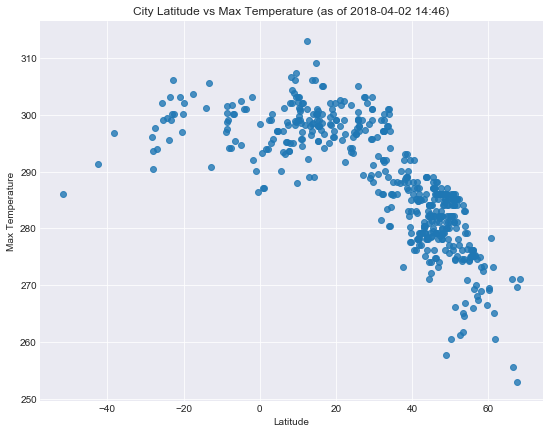

In [61]:
# Temperature (F) vs. Latitude
fig = sns.regplot(x = world_cities_info_df['Latitude'], y = world_cities_info_df['Max Temp'], fit_reg=False)
fig.set(xlabel = "Latitude", ylabel = "Max Temperature", title ="City Latitude vs Max Temperature (as of " + current_datetime + ")")
fig.figure.set_size_inches(9, 7)
sns.set_style("darkgrid")
plt.savefig('City Latitude vs Max Temperature.png')

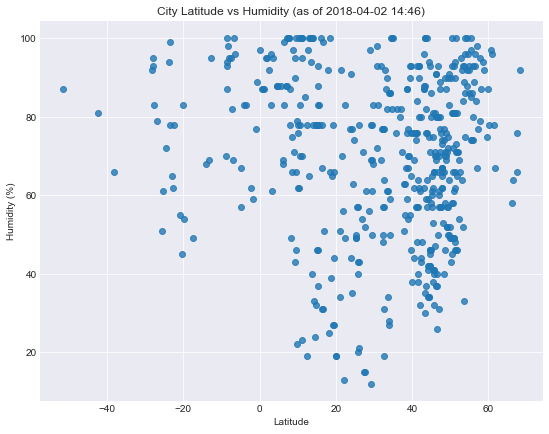

In [64]:
# Latitude vs. Humidity
fig = sns.regplot(x = world_cities_info_df['Latitude'], y = world_cities_info_df['Humidity'], fit_reg=False)
fig.set(xlabel = "Latitude", ylabel = "Humidity (%)", title ="City Latitude vs Humidity (as of " + current_datetime + ")")
fig.figure.set_size_inches(9, 7)
sns.set_style("darkgrid")
plt.savefig('City Latitude vs Humidity.png')

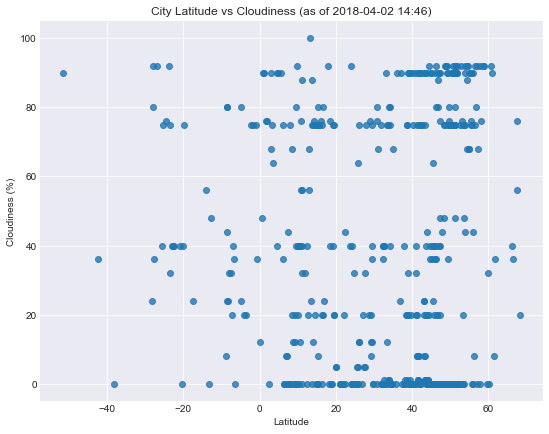

In [65]:
# Cloudiness (%) vs. Latitude Plot
fig = sns.regplot(x = world_cities_info_df['Latitude'], y = world_cities_info_df['Cloudiness'], fit_reg=False)
fig.set(xlabel = "Latitude", ylabel = "Cloudiness (%)", title ="City Latitude vs Cloudiness (as of " + current_datetime + ")")
fig.figure.set_size_inches(9, 7)
sns.set_style("darkgrid")
plt.savefig('City Latitude vs Cloudiness.png')

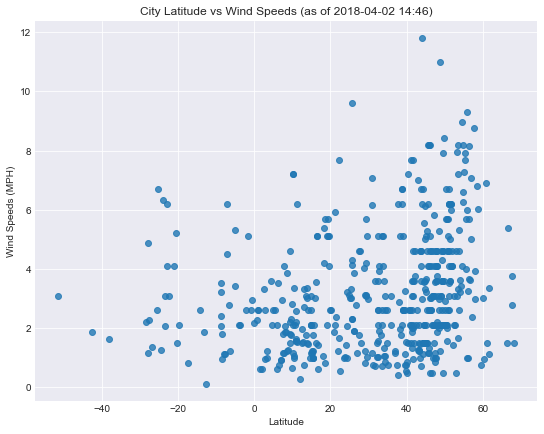

In [66]:
# Wind Speed (mph) vs. Latitude
fig = sns.regplot(x = world_cities_info_df['Latitude'], y = world_cities_info_df['Wind Speeds'], fit_reg=False)
fig.set(xlabel = "Latitude", ylabel = "Wind Speeds (MPH)", title ="City Latitude vs Wind Speeds (as of " + current_datetime + ")")
fig.figure.set_size_inches(9, 7)
sns.set_style("darkgrid")
plt.savefig('City Latitude vs Wind Speeds.png')